<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_szovek_feldolgozas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# File-ok feldolgozása


Nagy mennyiségű adatok feldolgozásánál elengedthetetlen dolog a számítógépek memóriáján (RAM) kívűl a külső tárolókon (merevlemezek, egyéb adathordozók) tárolt file-ok megfelelő használata is.

Az alábbiakban a python alapértelmezett filekezelő függvényeivel ismerkedünk meg, 
majd a `numpy` csomag filekezelő rutinjaival barátkozunk meg.



In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---

## A python beépített filekezelő függvényei

Ebben a fejezetben a `python` egyéb moduloktól független, alapvető fileműveleteket biztosító függvényeivel fogunk megismerkedni. Ezen függvények egy file tartalmát többnyire karakterláncok formájában kezelik, ezért konkrét formátumú adatok beolvasása, illetve kiírása némi bonyodalommal jár, melyeket legtöbbször valamilyen specifikusan az adott feladatra megírt függvény tesz lehetővé. Az alábbi részben a történelmi napfoltszám-megfigyelések [adatainak](http://www.sidc.be/silso/datafiles) az elemzésén keresztül ismerkedünk meg ezekkel a függvényekkel. 

### File-ok beolvasása

Egész file beolvasása egyetlen karakterláncba az alábbiak szerint történik. 

Előszöris az `open()` függvény segítségével megnyitjuk a beolvasni kívánt file-t. Az `open()` függvény egy előkészítő függvény, amely arra készíti fel a rendszert, hogy az adott merevelemezen (vagy más adattárolón) fellelhető file-lal dolgozni tudjunk. Legegyszerűbb esetben ez a file nevének a megadásával történik.

In [0]:
file1 = open('SN_m_tot_V2.0.txt')

A fenti kódsor hatására a `file1` változón keresztül férhetünk hozzá a file tartalmához. A file teljes tartalmát például a következő utasítással tölthetjük be egy karakterlánc formájában az `egeszfile` változóba:

In [0]:
egeszfile=file1.read()

Figyelem, ne keverjük össze a `file1` és az `egeszfile` változókat! Amint azt fent is említettük, az `egeszfile` egy karakterlánc, a `file1` pedig a file-ból való olvasást, illetve a file-ba való írást segítő segédobjektum, amelyet szokás esetenként (adat)folyam-nak vagy angolul streamnek is nevezni.

Ha már minden olvasás és írás befejeződött, akkor a `close()` utasítással zárhatjuk be a folyamot, azaz ez a parancs szakítja meg a kommunikációt az adattárolóval.

In [0]:
file1.close()

Mivel fent betöltöttük a file tartalmát az `egeszfile` stringbe, ezért ennek segítségével bele is pillanthatunk, vizsgáljuk meg például az első 100 karaktert a file-ból:

In [0]:
egeszfile[:100]

'#1. oszlop ev  ho  T[ev]  napfolt_szam\n#2. oszlop honap\n#3. oszlop az ido evben merve \n#4. oszlop Na'

Ha megnézzük magát a [file](data/NAPFOLT/SN_m_tot_V2.0.txt)-t, akkor látható hogy tényleg ezek a dolgok vannak benne. Figyeljük meg hogy a sor vége helyett a `\n` karakter szerepel! 

A `read()` függvény előre specifikált számú karakter olvasását is lehetővé teszi. Nyissuk meg ismét az előző file-t ismét:

In [0]:
file1 = open('SN_m_tot_V2.0.txt')

Olvassunk be 10 karaktert a fileból az alábbi módon:

In [0]:
karakterek1=file1.read(10)

A `karakterek1` változó ezután a file első 10 karakterét tartalmazza (vessük össze ezt az `egeszfile[:100]` parancs kimenetével): 

In [0]:
karakterek1

'#1. oszlop'

Ha ismét meghívjuk a `file1` változó `read()` függvényét, akkor az a következő 10 karaktert olvassa be:

In [0]:
karakterek2=file1.read(10)

In [0]:
karakterek2

' ev  ho  T'

Látjuk tehát hogy a `read()` utasítás hatására könyörtelenül haladunk végig a file karakterein: úgy tűnhet, ha már egyszer valamit beolvastunk, akkor azt többé már nem tudjuk! Szerencsére ez nem így van, mivel a `tell()` és a `seek()` függvények segítségével kérdezhetjük le, illetve állíthatjuk be egy megnyitott filefolyam aktuális pozicióját.

A `tell()` függvényt alkalmazva a `file1` változóra megkaphatjuk az aktuális folyampoziciót. Ami a jelen esetben 20, hiszen az előző két read parancs 10 karaktert olvasott be!

In [0]:
file1.tell()

20

A `seek()` parancs segítségével a file egy teszőleges helyére ugorhatunk. A `seek(n)` függvény alkalmazásával a file `n`-edik karakterére ugrunk. Ha ezután alkalmazzuk a `read()` függvényt, akkor a file tartalmát ettől a poziciótól olvassuk.

In [0]:
file1.seek(5)

5

Az alábbi parancs tehát a 5. karaktertől olvas be újabb 10 darab karaktert. 

In [0]:
karakterek3=file1.read(10)

In [0]:
karakterek3

'szlop ev  '

Zárjuk ismét be a file-t!

In [0]:
file1.close()

Nagyon sok esetben az adatfile-okban hordozott információ táblázatszerűen vannak rendezve. Az file minden sora hasonló tagolással csoportosítja a számunkra értékes adatokat. 
Egy megnyitott file minden sorát - mint soronkénti karakterláncok listáját - a readlines függvény segítségével gyárthatjuk le.

In [0]:
file1 = open('SN_m_tot_V2.0.txt')    

In [0]:
sorok = file1.readlines()

Mivel már nincs szükség a a file-ra ezért be is csukjuk azt!

In [0]:
file1.close()    

A sorok lista minden eleme most tehát egy egy sor a file-ból, vizsgáljuk meg például az első 10 sort:

In [0]:
sorok[0:10]

['#1. oszlop ev  ho  T[ev]  napfolt_szam\n',
 '#2. oszlop honap\n',
 '#3. oszlop az ido evben merve \n',
 '#4. oszlop Napfoltok szamanak atlaga\n',
 '#5. oszlop Napfoltok szamanak szorasa, negativ ertekek azt jelentik hogy az informacio nem all rendelkezesre!\n',
 '#6. oszlop Napfolt meresek szama,      negativ ertekek azt jelentik hogy az informacio nem all rendelkezesre!\n',
 '1749 01 1749.042   96.7  -1.0    -1  \n',
 '1749 02 1749.123  104.3  -1.0    -1  \n',
 '1749 03 1749.204  116.7  -1.0    -1  \n',
 '1749 04 1749.288   92.8  -1.0    -1  \n']

Amint látjuk, az első hat sor a '#' karakterrel kezdődik, és minden ilyen sor azt mondja meg hogy a tényleges adatok megfelelő oszlopa mit tartalmaz. A hetedik sortól lefelé viszont szóközökkel elválasztott számok vannak, ez maga a hőn áhitott adat, de sajnos még mindig karakterláncok formájában! 

Az első értékes adatsor a file 7.-sora:

In [0]:
sorok[6]

'1749 01 1749.042   96.7  -1.0    -1  \n'

Egy karakterláncot a `split()` parancs segítségével adott karakterek mentén fel tudunk vágni egy listába. A `split()` parancs alapértelmezésben szóközök szerint vágja fel a megjelölt karakterláncot, így az első értékes adatsor oszlopokra szabása az alábbiak szerint történik:

In [0]:
sorok[6].split()

['1749', '01', '1749.042', '96.7', '-1.0', '-1']

Az eredmény tehát egy lista mely tartalmazza az értékes adatokat, ugyan még mindig karakterláncok formájában! 
Az egyes elemeket lebegőpontos számmá a már ismert `float()` függvénnyel konvertálhatjuk. Tehát az első adatsor negyedik oszlopából a következő módon készíthetünk hús-vér számot:

In [0]:
float(sorok[6].split()[3])

96.7

Ha már egy elemet számmá tudunk konvertálni, akkor egy `for` ciklus segítségével számokat tartalmazó listákba tudjuk rendezni az adatokat a már megszokott módon:

In [0]:
num_napfolt=[]
meresi_ido=[]
for sor in sorok[6:]:
    num_napfolt.append( float(sor.split()[3]) )
    meresi_ido.append(  float(sor.split()[2]) )

Ábrázoljuk végül a napfoltok számát az évek függvényében:

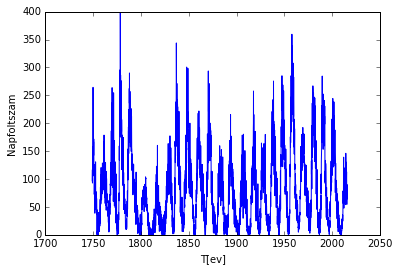

In [0]:
plot(meresi_ido,num_napfolt)
xlabel('T[ev]')
ylabel('Napfoltszam')

### Mentés

Az adatok beolvasása mellett sokszor lehet szükség a feldolgozott információ újbóli kiírására. Erre a `python` az adatfolyam típusú változókra alkalmazott `write()` függvényt kínálja. Vizsgáljuk meg, hogy hogy működik a fileírás, egy egyszerű példán! Nyissunk meg egy file-t, amelybe írni szeretnénk, ezt az `open()` függvény `mode` kulcsszavas paraméterén keresztül tudjuk jelezni a `mode='w'` beállítással. Itt a `w` az írási módot jelenti.

In [0]:
file2=open('mentes1.dat',mode='w')

A `file2` folyamba a `write()` függvény segítségével tudunk karakterláncokat írni:

In [0]:
file2.write('#Ez az elso kiirt fileom!\n')

26

A write fügvény alapértelmezett visszatérési értéke a file-ba kiírt karakterek száma. A biztonság kedvéért zárjuk be a file-t!

In [0]:
file2.close()

Ha már meglévő file-hoz szeretnénk további karaktereket fűzni, akkor az `open()` függvény `mode` paraméterének `mode='a'` beállításával jelezzük ezt. Az `'a'` karakter itt az append angol szó rövidítése, mely ismerős lehet már számunkra egy, a listákra vonatkozó függvény nevéből.

In [0]:
file2=open('data/mentes1.dat',mode='a')

Írjuk ki a mérési idő (`meresi_ido`) és a napfoltok számát tartalmazó (`num_napfolt`) adatokat a már fent létrehozott `data/mentes1.dat` file-ba. 
Ezt egy `for` ciklus segítségével fogjuk megtenni:

In [0]:
for i in range(len(meresi_ido)):
    file2.write(str(meresi_ido[i])+' '+str(num_napfolt[i])+'\n')

A `write()` függvény hasába írt karakterlánc a `meresi_ido` és `num_napfolt` tömbök megfelelő sorában lévő elemet tartalmazza szóközzel elválasztva, illetve a sor végét egy sortörés `'\n'` -el jelezve.

Zárjuk ismét be a file-t:

In [0]:
file2.close()

A beolvasáshoz hasonlóan a kiíratásnál is van lehetőség egész sorok kiírására. Ezt, talán nem túl meglepő módon a `writelines()` függvény valósítja meg. Ez a függvény karakterláncok listáját írja ki egy file-ba egy megnyitott filefolyamon keresztül.  

In [0]:
file3=open('data/mentes2.dat',mode='w')

Ha a lista minden karakterlánca `'\n'` karakterre végződik, akkor a kiíratás során a file-ban minden listaelem egy-egy külön sorba kerül:

In [0]:
sorok=['Ez az elso sor\n','Ez a masodik sor\n'];

In [0]:
file3.writelines(sorok)

Mi történik, ha lemarad a `'\n'` ? 

In [0]:
sorok=['Ez az harmadik','Ez hova kerult?\n'];

In [0]:
file3.writelines(sorok)

In [0]:
file3.close()

Vizsgáljuk meg magát a file-t!

### Különös karakterek karakterláncokban

A fentiekben már többször is találkoztunk a sortörést jelölő `'\n' ` karakterrel. Ehhez hasonlóan van néhány más úgynevezett [literális](https://docs.python.org/2.0/ref/strings.html) karakter, amelynek speciális jelentése van. Ezek közül az alábbi táblázatban összefoglalunk néhányat:


karakter |	jelentés
-|-
\n|	sortörés
\r|	kocsi vissza
\t|	vízszintes kihagyás (TAB)
\v| függőleges kihagyás (TAB)
\xhh..| hexadecimális karakter hh.. értékkel



A print függvény segítségével az alábbi példán demonstráljuk a `'\r'`, `'\t'`, és a már ismert `'\n'` hatását:

In [0]:
print("EZEK ITT NAGYBETUKezek itt kisbetuk")

EZEK ITT NAGYBETUKezek itt kisbetuk


In [0]:
print("EZEK ITT NAGYBETUK\rezek itt kisbetuk")

ezek itt kisbetuk


In [0]:
print("EZEK ITT NAGYBETUK\tezek itt kisbetuk")

EZEK ITT NAGYBETUK	ezek itt kisbetuk


In [0]:
print("EZEK ITT NAGYBETUK\nezek itt kisbetuk")

EZEK ITT NAGYBETUK
ezek itt kisbetuk


Ezek a karakterek file-ba való írás közben is hasonlóan viselkednek!

---

## Numpy filekezelő rutinok

Amint korábbiakban is láthattuk, a `numpy` csomag `array` típusú változói számos előnyös tulajdonsággal rendelkeznek a sima `list` típusú változókhoz képest. 

A `numpy` csomag biztosít néhány hasznos filekezelő rutint, melyek az `array` tipusú változók file-ba kiírására, illetve file-okból történő beolvasására használhatóak. Az alábbiakban két érdekes példán keresztül fogjuk megvizsgálni ezeket a függvényeket.


Elemezzük Felix Baumgartner ugrásának adatait. 
Az ugrás megtett út$--$idő adatait a `data/BAUMGARTNER/h_vs_t` file-ban találjuk. 

A file két oszlopnyi számot tartalmaz. Az első oszlop az idő s-ban, a második oszlop az adott időben mért magasság m-ben. 
Ilyen jellegű egyszerű struktúrájú file-ok beolvasására és az adatok array-ba való töltésére a `numpy` csomag `loadtxt` függvényét használhatjuk:

In [0]:
baum_data=loadtxt('h_vs_t.txt')

A `baum_data` tömb első oszlopát a a `t` változóba, a második oszlopát pedig a `h` változóba tároljuk:

In [0]:
t=baum_data[:,0] # idő
h=baum_data[:,1] # magasság

Ábrázoljuk az adatokat! A tengelyfeliratok természetesen nem maradhatnak el!

Text(0, 0.5, 'Magassag [m]')

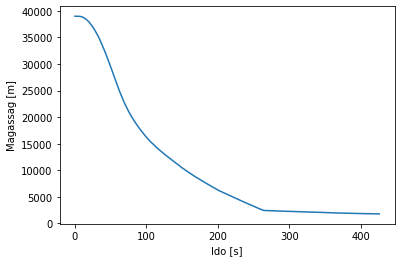

In [0]:
plot(t,h)
xlabel('Ido [s]')
ylabel('Magassag [m]')

Az ugrással kapcsolatban egy igen fontos kérdés volt, hogy vajon sikerült-e szabadesésben átlépni a hangsebességet? Vizsgáljuk meg, hogy ezen adatok alapján vajon átlépte-e Felix Baumgartner a hanghatárt! Először is szükség van a sebesség időfüggésére. Ezt a magasság$--$idő függvény numerikus deriváltjával fogjuk most meghatározni. 
Ha egy $y(x)$ függvényt mintavételezésével véges darab $x_i,y_i$ párt kapunk, akkor az $y(x)$ függvény numerikus deriváltját a következő differencia hányadossal közelíthetjük:


 $$\left . \frac{\mathrm{d}y}{\mathrm{d}x}\right|_{x_i} =\frac{y_{i+1}-y_i}{x_{i+1}-x_i} $$

Definiáljunk most egy függvényt, mely  két ugyanolyan hosszúságú  tömb `x` és `y` adataiból legenerálja a két tömb numerikus derviáltját. Figyeljük meg, hogy az utolsó és az első adatpontban a fenti képlettől egy kicsit eltérő módon járunk el.

In [0]:
# numerikus derivált függvény
def nderiv(y,x):
    "Első szomszéd differenciál"
    n = len(y) # adatpontok száma
    d = zeros(n) # változó inicializálás. A zeros() függvény tetszőleges alakú és 0-kat tartalmazó arrayt gyárt
    # mivel a legegyszerűbb numerikus differenciálás nem szimmetrikus a végpontokat
    # kicsit másképp kezeljük mint a tömb belsejében lévő pontokat
    for i in range(1,n-1):
        d[i] = (y[i+1]-y[i])/(x[i+1]-x[i])   #egy általános pont deriváltja
    d[0] = (y[1]-y[0])/(x[1]-x[0])           #az első pont deriváltja
    d[n-1] = (y[n-1]-y[n-2])/(x[n-1]-x[n-2]) # az utolsó pont deriváltja
    return d


<img  src="XA99SXT37G5VNU1K1K8UJRQW04FIOI7A.png"/>

Az nderiv függvény segítségével a sebesség meghatározható.

In [0]:
v=nderiv(h,t) # Figyelem az első változó a h a második a t!!!

Vizsgáljuk meg a sebesség$--$idő függvényt!

Text(0, 0.5, 'Sebesseg [m/s]')

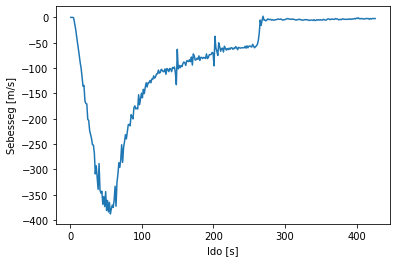

In [0]:
plot(t,v)
xlabel('Ido [s]')
ylabel('Sebesseg [m/s]')

Mivel általában a hang terjedési sebessége függ a magasságtól, ezért annak érdekében, hogy megtudjuk, hogy sikerült-e áttörni a hanghatárt, célszerű a sebességet a magasság függvényében ábrázolni:

Text(0, 0.5, 'Sebesseg [m/s]')

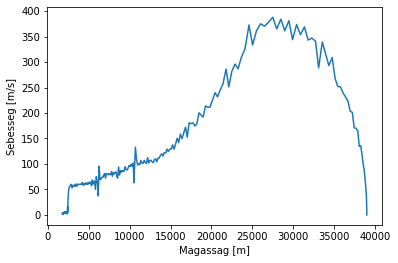

In [0]:
plot(h,abs(v))
xlabel('Magassag [m]')
ylabel('Sebesseg [m/s]')

A wikipédián található [adatok](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Comparison_US_standard_atmosphere_1962.svg/2000px-Comparison_US_standard_atmosphere_1962.svg.png) alapján a hangsebesség 25km magasságban valamivel 300 m/s alatt van. Ezen a magasságon Felix sebessége 350 m/s körül mozgott, tehát a rekord - a mérési adatok alapján - sikerült!


Vizsgáljuk meg a `loadtxt()` függvény néhány paraméterét is! Ezt a feladatot a 2014-es ebola járvány statisztikai adatait tartalmazó file segítségével fogjuk megtenni.

Próbáljuk meg betölteni a `'data/EBOLA/ebola_vesszoesszazalekjel.txt'` - filet!

In [0]:
ebola_data=loadtxt('ebola_vesszoesszazalekjel.txt')

ValueError: could not convert string to float: '%'

A szemfüles halgatók talán sikeresen ki tudják bogozni a fenti hibaüzenetet: 

*A '%' jelet nem tudom számmá konvertálni!*

Ha megvizsgáljuk magát a file-t, akkor láthatjuk, hogy a napfoltadatoktól eltérő módon itt az adatokat szolgáltató személy a legtöbbször alkalmazott '#'-jel helyett a '%'-ot alkalmazta! Jelezzük ezt a függvénynek a `comments='%'` kapcsoló segítségével!

In [0]:
ebola_data=loadtxt('ebola_vesszoesszazalekjel.txt',comments='%')

ValueError: could not convert string to float: '0,'

Ismét hiba üzenet:

 *a '0,' karakterláncot nem tudom számmá konvertálni !*
 
Ha megnézzük a file-t akkor láthatjuk hogy most szóközök helyett az oszlopok bizony vesszővel, azaz a `','`-karakterrel vannak elválasztva! Jelezzük ezt a függvénynek a `delimiter=','` kapcsoló segítségével!

In [0]:
ebola_data=loadtxt('ebola_vesszoesszazalekjel.txt',comments='%',delimiter=',')

Így most már be tudtuk tölteni a file-t!

A `usecols` és az `unpack` kulcsszavak segítségével specifikálhatjuk azt, hogy melyik oszlopokra vagyunk kíváncsiak, illetve hogy kicsomagolható formában térjen vissza a függvény.
Beleolvasva szemmel a file-ba felvilágosítást kaphatunk, hogy melyik oszlopban milyen adat szerepel.
Az alábbi minta például a `Nap,GuinLab,LibLab,NigLab,SLLab` és `SenLab` tömbökbe tölti be az országonkénti laboratóriumban kivizsgált megbetegedések számát, illetve a járvány kitörése óta eltelt napok számát.

In [0]:
Nap,GuinLab,LibLab,NigLab,SLLab,SenLab=loadtxt('data/EBOLA/ebola_vesszoesszazalekjel.txt',
                                               comments='%',
                                               usecols=(0,3,6,9,12,15),
                                               unpack=True,
                                               delimiter=',')

Ábrázoljuk a fenti adatok közzül a Guineában vizsgált fertőzések számát az idő függvényében:

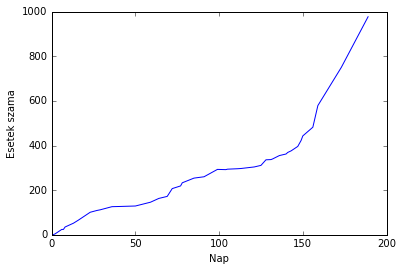

In [0]:
plot(Nap,GuinLab)
xlabel('Nap')
ylabel('Esetek szama')

A már korábban megismert `savetxt()` függvény segítségével tölthetjük a feldolgozott `array` formátumú változókat file-ba:

In [0]:
savetxt('data/mentes_ebola_Guinea.dat',GuinLab)

A `savetxt()` a `loadtxt()` hez hasonlóan számos kulcsszavas paraméterrel bír. Ezek közül az alábbi példában bemutatjuk a `header=` és a `comments=` paraméterek használatát.
Az alábbi példa azt is illusztrálja, hogy ha ugyanolyan hosszúságú adatokat akarunk egymás melletti oszlopokba írni akkor azokat zárójelben egymás után felsorolva tehetjük meg:

In [0]:
savetxt('data/mentes_ebola_Guinea_vs_time.dat',
        (Nap,GuinLab),
        header=' Guineai halalozasi adatok',
        comments='@')